## <h1><center>Course: Introduction to Machine Learning</center></h1>
## <h1><center>Assigment 2</center></h1>
### <h1><center>Important NOTE: In order to get full grades, for every question, you need to provide the details of your work on how to get to a solution or the end of the proof</center></h1>
#### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
#### <h1><center>TA: Hai Nguyen</center></h1>
##### <h1><center>Due day: 11:00 pm, Thursday, 22 September, 2022 </center></h1>
#### If you gonna use this jupyter notebook for the assignment, please convert to .pdf file for submission. All submission must be in pdf format except codes.

## **Question 1** (Linear regression + regularization techniques + data augmentation) (+50)

In this problem, we approximate the polynomial from noisy data points. To that end, we generate a data pair $(x^{(i)}, y^{(i)})$ from the following noise-corrupted relation  

$$ y^{(i)} = .5 - {x^{(i)}} - .5 {x^{(i)}}^2 - 2 {x^{(i)}}^3 + 5 {x^{(i)}}^4 + \delta \varphi^{(i)} x^{(i)}$$
of the following  ground truth function
$$ y = .5 - {x} - .5 {x}^2 - 2 {x}^3 + 5 {x}^4$$

where $\delta = 0.05$ is the noise level, $\varphi$ is drawn from standard normal distribution. We need to generate 8 holdout samples and 7 training samples.

- (1.a) (+5) Fill the generating data code and produce figures to visualize data and true functions.
- (1.b) (+5) Perform the LinearRegression() using polynomial approximation of order of 1, 10 and 4. Visualizing each cases to see which case are overfitting, underfitting and good fit. Adding the mean square error of the holdout data to support your observation.
- (1.c) (+10) For overfitting senario, applying L2 regularization. You need to do: 
    + step 1: Plot the L2 regularization model versus no regularization model versus the ground truth function in one plot to see how L2 works (pick a reasonable $\lambda$).
    + step 2: Plot the mean square error of holdout data as a function of the regularization parameter $\lambda$ over the range $\lambda \in [10^{-5},10]$. What is the optimal $\lambda$ approximately? 
    + step 3: Using L-curved technique (read [https://www.sintef.no/globalassets/project/evitameeting/2005/lcurve.pdf]) to find out the optimal $\lambda$. The L-curved line is the one represents the relationship between residual norm $||y - f(x,\theta)||_2$ and solution norm $||\theta||_2$. Plot the L-curve and compare the optimal values of $\lambda$ from step 2 and step 3?
- (1.d) (+10) For overfitting senario, applying L1 regularization. Repeat the all 3 steps in the question (1.c).
- (1.e) (+10) For overfitting senario, applying Elasticnet regularization (a mixture of L1 and L2), i.e., the loss function with Elasticnet regularization is 
$$ J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \theta^\top x^{(i)}) + \lambda \cdot ||\theta||_1 + \frac{1}{2} \gamma ||\theta||_2^2$$

We are interested in the performance of the mean square error of the holdout data as a function of $\lambda$ and $\gamma$. One way to achieve this is to plot the contour of the mean square error of the holdout data as a function of $\lambda$ and $\gamma$. Discuss the relationship between Elasticnet and L2, L1 regularization?

- (1.g) (bonous +10) The question is **can we do something else** and yet achieve the same regularization effect? One way to accomplish this is via **data augmentation technique**. The data augmentation technique that we study consists of 4 steps:
    + step 1: Clone 7 training data samples (X in the code) into 350 samples (using numpy.repeat). (Note: this is noise-free data).
    + step 2: We add noise these 350 samples by $$\tilde{x}^i = x^i + \delta \varphi^i,$$ where $\varphi^i$ is drawn from standard normal distribution. We get X_data_augmented.
    + step 3: Similarly, clone 7 training label data into 350 samples (using numpy.repeat), denoted y_data_augmented. 
    + step 4: Using Linearregression to train using data augmented data pairs (X_data_augmented, y_data_augmented).

    You need to (1) generate augmented data, (2) Determine a good noise level $\delta$ by trying different values of $\delta$? Explain why too much or too small noise is not good? To answer the last question, you may need to read the folllowing references
    1. Train Neural Networks With Noise to Reduce Overfitting, [https://machinelearningmastery.com/train-neural-networks-with-noise-to-reduce-overfitting/]
    2. [https://arxiv.org/abs/2208.04995]

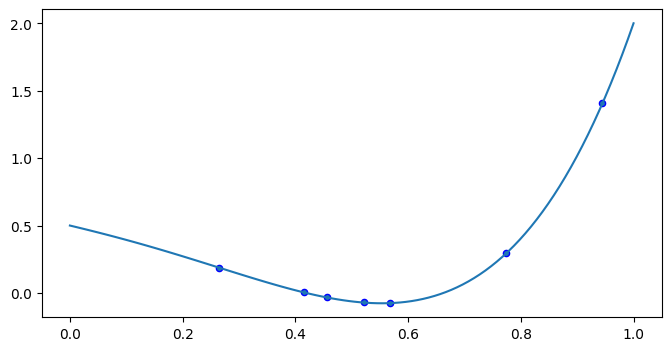

In [55]:
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings('ignore')

# import numpy as np
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [8, 4]

# import pandas as pd
# from sklearn import datasets
# np.random.seed(0)

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, LogisticRegression

# ## please keep the below codes for generating x, DO NOT CHANGE!
# # ==========================================================================================
# # holdout samples
# n_holdout_samples = 8
# X_holdout = np.sort(np.random.rand(n_holdout_samples)) 

# # Training samples
# n_samples = 7
# X = np.sort(np.random.rand(n_samples)) 
# # ==========================================================================================
 
# def true_fn(X): 
#     return 0.5 - X - 0.5*(X**2)-2*(X**3)+5*(X**4)
 
# y = true_fn(X) + X * 0.05 * np.random.normal(loc=0.0, scale=1.0, size=None)
# y_holdout = true_fn(X_holdout) + X_holdout * 0.05 * np.random.normal(loc=0.0, scale=1.0, size=None)

# X_test = np.linspace(0, 1, 100) 
# plt.plot(X_test, true_fn(X_test), label="True function") 
# plt.scatter(X, y, edgecolor='b', s=20, label="Samples") 

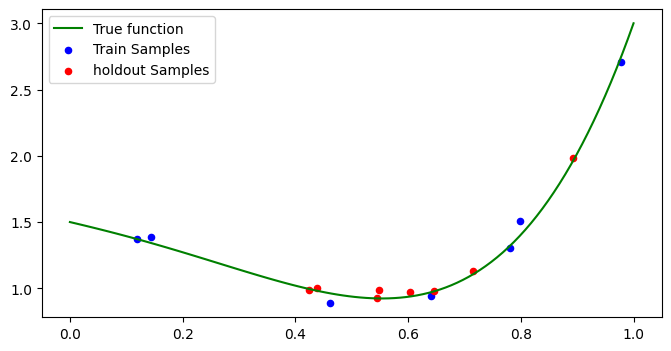

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets
np.random.seed(0)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, LogisticRegression


order_true = 5
true_coefficient = np.array([.5, -1, -.5, -2, 5])

def true_fn(X):
    f = np.ones((X.shape))
    for i in range(order_true):
        f += true_coefficient[i] * X**i
    return f

# Test samples
n_holdout_samples = 8
X_holdout = np.sort(np.random.rand(n_holdout_samples))
Y_holdout = true_fn(X_holdout) + np.random.randn(n_holdout_samples) * 0.05 * true_fn(X_holdout)

# Training samples
n_samples = 7

X = np.sort(np.random.rand(n_samples))
Y = true_fn(X) + np.random.randn(n_samples) * 0.05 * true_fn(X)

X_test = np.linspace(0., 1., 100)

plt.plot(X_test,true_fn(X_test),'g',label = 'True function')
plt.scatter(X,Y, edgecolor='b', s=20, facecolor = 'b', label="Train Samples")
plt.scatter(X_holdout,Y_holdout, edgecolor='r', facecolor = 'r', s=20, label="holdout Samples")
plt.legend()

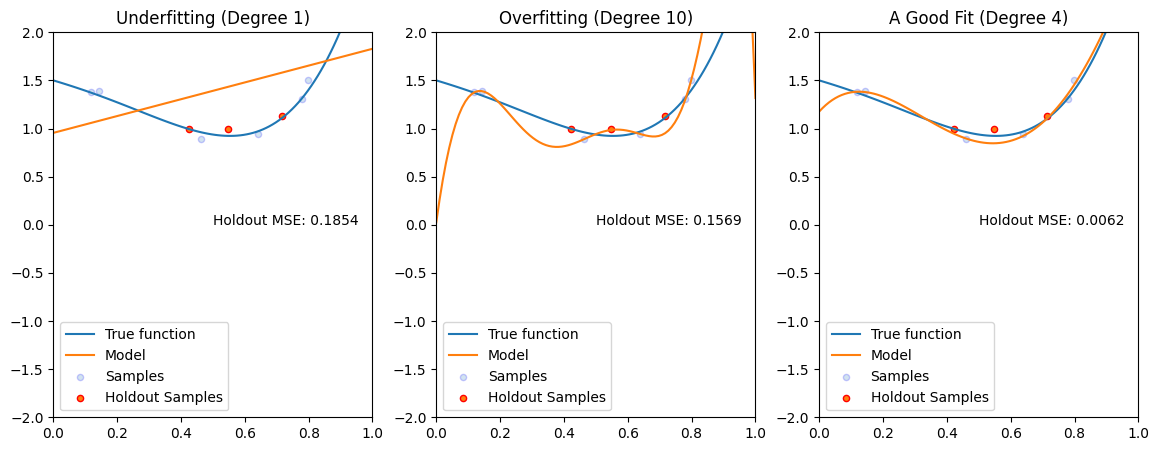

In [2]:
degrees = [1, 10, 4] 
titles = ['Underfitting', 'Overfitting', 'A Good Fit'] 
plt.figure(figsize=(14, 5)) 
for i in range(len(degrees)): 
    ax = plt.subplot(1, len(degrees), i + 1) 
 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False) 
    linear_regression = LinearRegression() 
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)]) 
    pipeline.fit(X[:, np.newaxis], Y) 
 
    ax.plot(X_test, true_fn(X_test), label="True function")     
    ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    ax.scatter(X, Y, edgecolor='b', s=20, label="Samples", alpha=0.2) 
    ax.scatter(X_holdout[::3], Y_holdout[::3], edgecolor='r', s=20, label="Holdout Samples") 
    ax.set_xlim((0, 1)) 
    ax.set_ylim((-2, 2)) 
    ax.legend(loc="best") 
    ax.set_title("{} (Degree {})".format(titles[i], degrees[i])) 
    ax.text(0.5,0, 'Holdout MSE: %.4f' % ((Y_holdout-pipeline.predict(X_holdout[:, np.newaxis]))**2).mean()) 

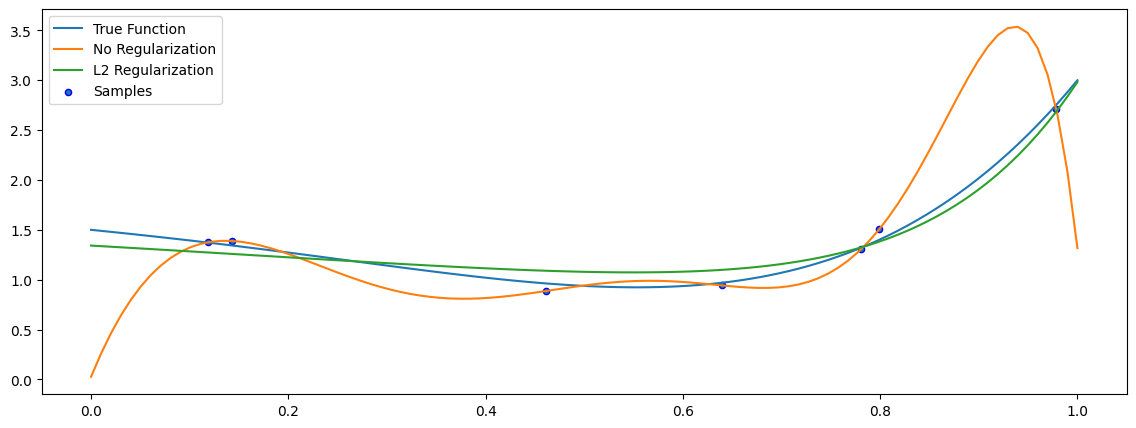

In [3]:
from sklearn.linear_model import Ridge 
 
plt.figure(figsize=(14, 5)) 

# fit a least squares model 
polynomial_features = PolynomialFeatures(degree=10, include_bias=False) 
linear_regression = LinearRegression() 
pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)]) 
pipeline.fit(X[:, np.newaxis], Y) 

# fit a Ridge model 
polynomial_features = PolynomialFeatures(degree=10, include_bias=False) 
linear_regression = Ridge(alpha=0.1) # sklearn uses alpha instead of lambda 
pipeline2 = Pipeline([("pf", polynomial_features), ("lr", linear_regression)]) 
pipeline2.fit(X[:, np.newaxis], Y)     

# plotting the three cases alongwith samples
plt.plot (X_test, true_fn(X_test), label = "True Function")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="No Regularization") 
plt.plot(X_test, pipeline2.predict(X_test[:, np.newaxis]), label="L2 Regularization")     
plt.scatter(X, Y, edgecolor='b', s=20, label="Samples") 
plt.legend() 

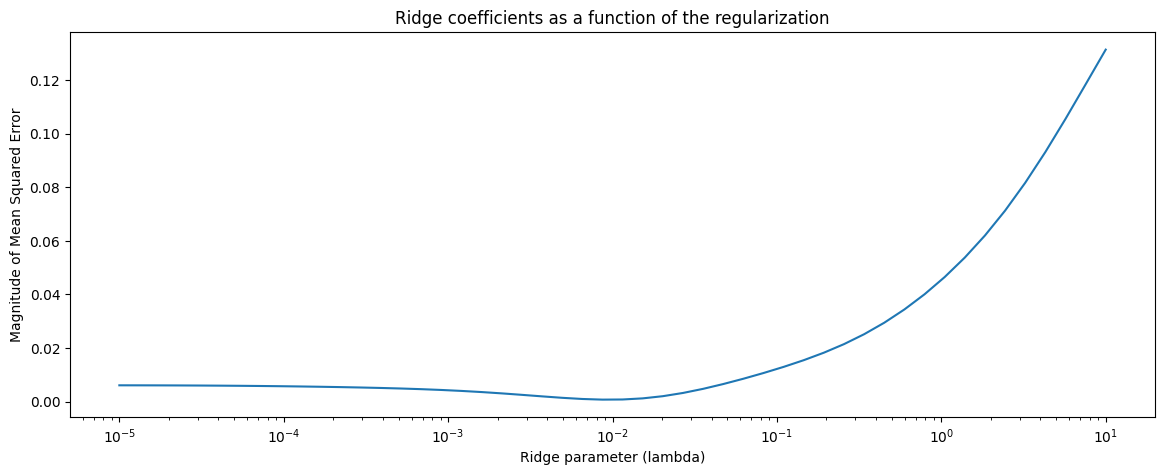

In [40]:
lambdas = np.logspace(-5, 1,  )
mse = []
for a in lambdas:
    polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
    linear_regression = Ridge(alpha=a)
    pipeline2 = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline2.fit(X[:, np.newaxis], Y) 
    mse.append(((Y_holdout-pipeline2.predict(X_holdout[:, np.newaxis]))**2).mean())

# plot ridge coefficients 
#plt.xlim([1e-5, 10])
plt.figure(figsize=(14,5))
plt.plot(lambdas,mse)
plt.xlabel('Ridge parameter (lambda)') 
plt.ylabel('Magnitude of Mean Squared Error') 
plt.title('Ridge coefficients as a function of the regularization') 
plt.xscale('log')
print(lambdas[mse.index(min(mse))])
#0.0086 looks like the optimal lambda value from the figure

0.00868511373751352


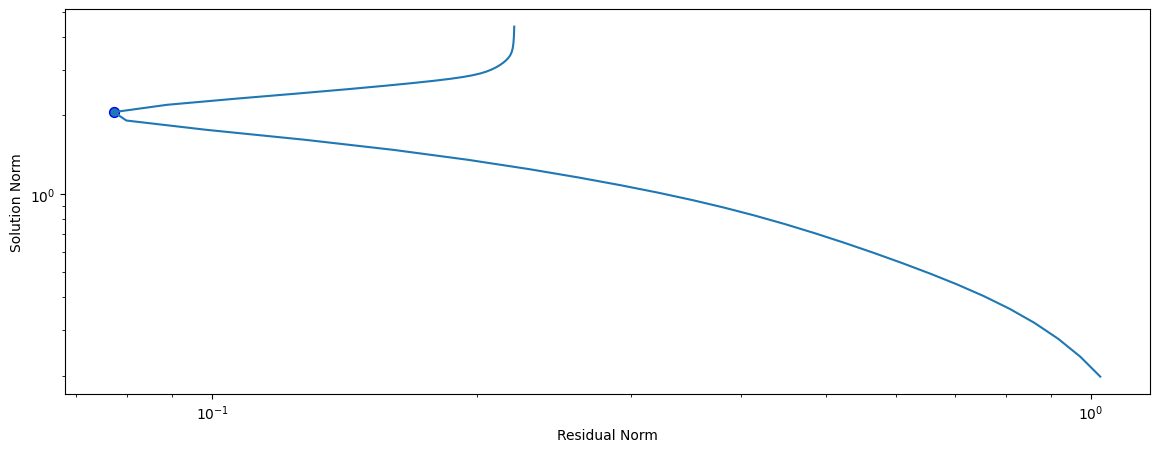

In [43]:
lambdas = np.logspace(-5, 1,  )
solnorm=[]
resnorm=[]
for a in lambdas:
    polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
    linear_regression = Ridge(alpha=a)
    pipeline2 = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline2.fit(X[:, np.newaxis], Y) 
    resnorm.append(np.linalg.norm((Y_holdout-pipeline2.predict(X_holdout[:, np.newaxis]))))
    #norm1.append(np.linalg.norm((Y-pipeline2.predict(X[:, np.newaxis]))))
    solnorm.append(np.linalg.norm(pipeline2['lr'].coef_))
plt.figure(figsize=(14,5))
plt.plot(resnorm,solnorm)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Residual Norm')
plt.ylabel('Solution Norm')
#plt.xlim([1e-2,5])
#plt.ylim([1e-1,100])
#From the plot, the corner point of the L curve is
print(lambdas[norm1.index(min(resnorm))])
resmin = np.min(resnorm)
solmin = solnorm[np.argmin(resnorm)]
plt.scatter(resmin, solmin, edgecolor = 'b', s= 50, label = "Min $\\lambda$")
#The optimal lambda (or alpha) value in this case is 0.0086 which is similar to the previous case.

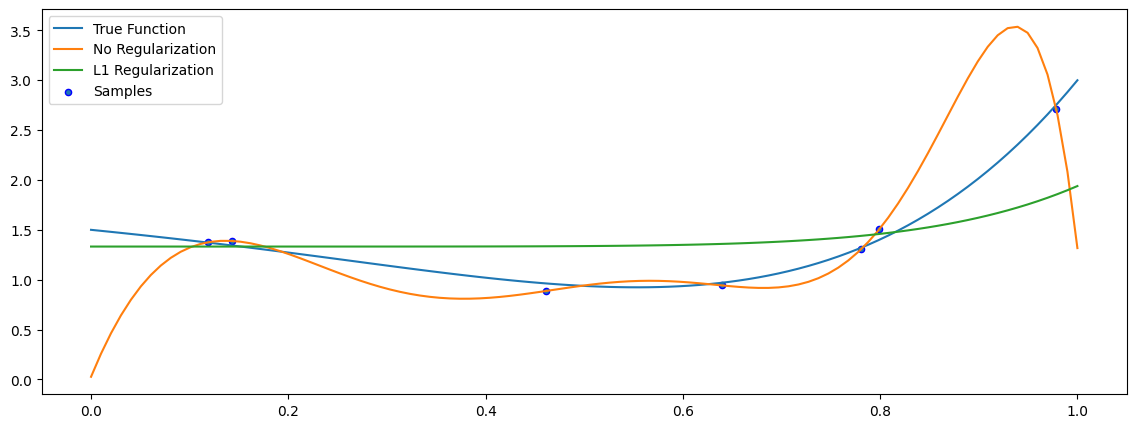

In [35]:
from sklearn.linear_model import Lasso
plt.figure(figsize=(14, 5))

# fit a least squares model
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
pipeline.fit(X[:, np.newaxis], Y)

# fit a Lasso model
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
linear_regression = Lasso(alpha=0.1) # sklearn uses alpha instead of lambda
pipeline3 = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
pipeline3.fit(X[:, np.newaxis], Y) 

# plotting the three cases alongwith samples
plt.plot (X_test, true_fn(X_test), label = "True Function")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="No Regularization") 
plt.plot(X_test, pipeline3.predict(X_test[:, np.newaxis]), label="L1 Regularization")     
plt.scatter(X, Y, edgecolor='b', s=20, label="Samples") 
plt.legend() 

0.0021209508879201904


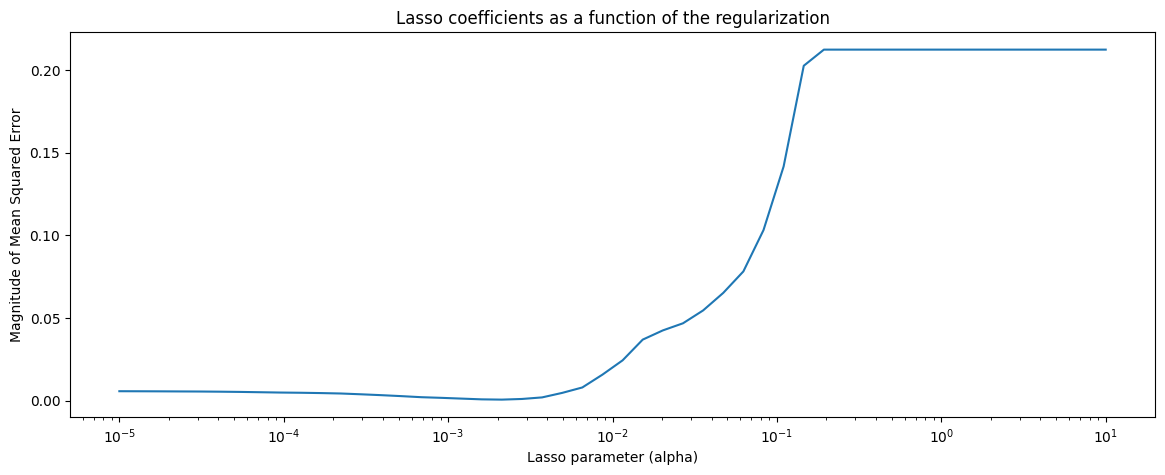

In [50]:
alphas = np.logspace(-5, 1,  )
mse = []
for a in alphas:
    polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
    linear_regression = Lasso(alpha=a)
    pipeline3 = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline3.fit(X[:, np.newaxis], Y) 
    mse.append(((Y_holdout-pipeline3.predict(X_holdout[:, np.newaxis]))**2).mean())
    
# plot lasso coefficients 
#plt.xlim([1e-5, 10])
plt.figure(figsize=(14,5))
plt.plot(alphas,mse)
plt.xscale('log')
plt.xlabel('Lasso parameter (alpha)') 
plt.ylabel('Magnitude of Mean Squared Error') 
plt.title('Lasso coefficients as a function of the regularization') 
#0.002 looks like the optimal lambda value from the figure
print(alphas[mse.index(min(mse))])

0.0021209508879201904


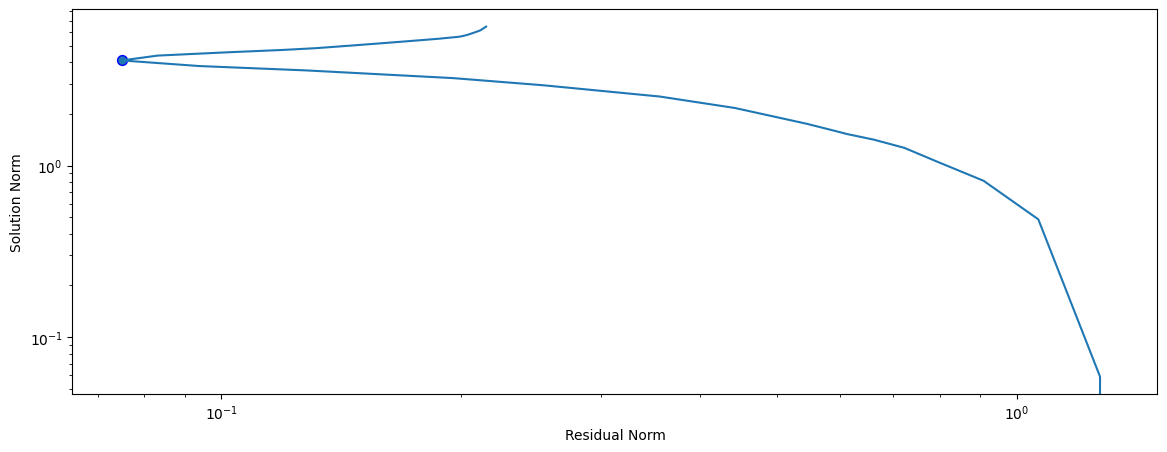

In [49]:
alphas = np.logspace(-5, 1,  )
solnorm=[]
resnorm=[]
for a in alphas:
    polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
    linear_regression = Lasso(alpha=a)
    pipeline3 = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline3.fit(X[:, np.newaxis], Y) 
    resnorm.append(np.linalg.norm((Y_holdout-pipeline3.predict(X_holdout[:, np.newaxis]))))
    solnorm.append(np.sum(np.abs((pipeline3['lr'].coef_))))
plt.figure(figsize=(14,5))
plt.plot(resnorm,solnorm)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Residual Norm')
plt.ylabel('Solution Norm')
#plt.xlim([1e-2,5])
#plt.ylim([1e-1,100])
#From the plot, the corner point of the L curve is
print(alphas[resnorm.index(min(resnorm))])
resmin = np.min(resnorm)
solmin = solnorm[np.argmin(resnorm)]
plt.scatter(resmin, solmin, edgecolor = 'b', s= 50, label = "Min $\\lambda$")
#The optimal lambda (or alpha) value in this case is 0.002 (same as last code)

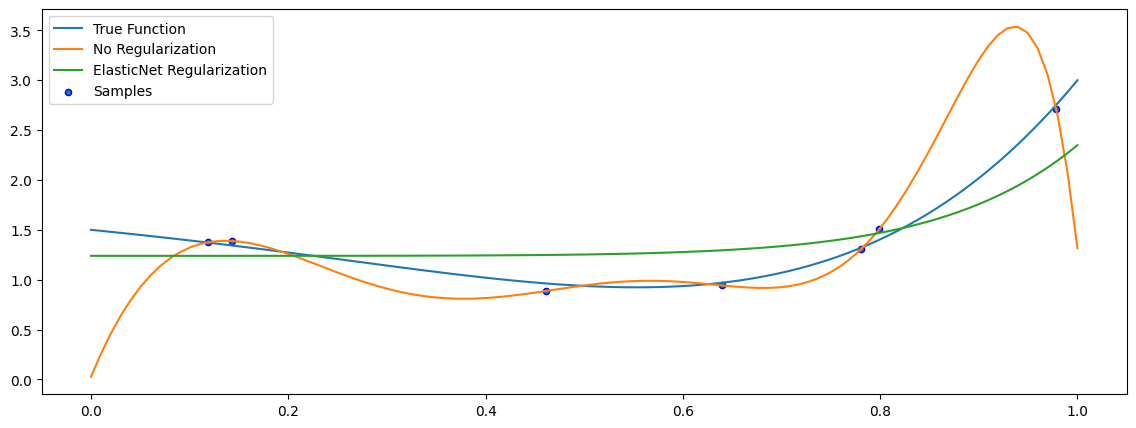

In [52]:
from sklearn.linear_model import ElasticNet
plt.figure(figsize=(14, 5))

# fit a least squares model
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
pipeline.fit(X[:, np.newaxis], Y)

# fit a ElasticNet model
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
linear_regression = ElasticNet(alpha=0.1, l1_ratio = 0.5) # sklearn uses alpha instead of lambda
pipeline4 = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
pipeline4.fit(X[:, np.newaxis], Y) 

# plotting the three cases alongwith samples
plt.plot (X_test, true_fn(X_test), label = "True Function")
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="No Regularization") 
plt.plot(X_test, pipeline4.predict(X_test[:, np.newaxis]), label="ElasticNet Regularization")     
plt.scatter(X, Y, edgecolor='b', s=20, label="Samples") 
plt.legend() 

(1e-05, 1)

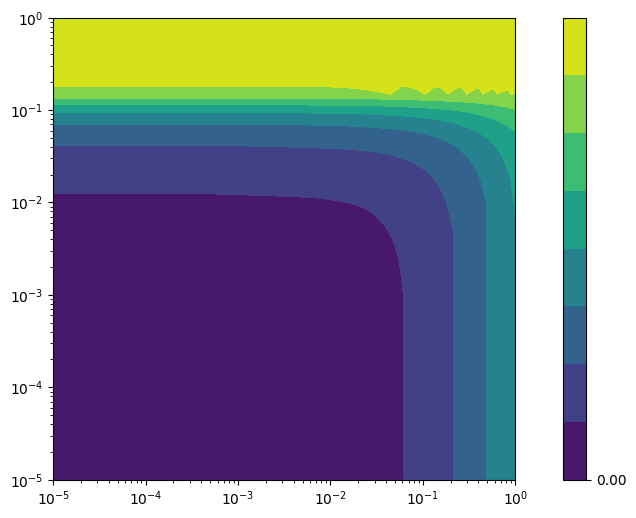

In [12]:
#Contour plot for ElasticNet
#degrees = [10]
import math
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, LogisticRegression
a1 = np.logspace(-5,1,50)
a2 = np.linspace(0,1,50)
A1, A2 = np.meshgrid(a1,a2)
plt.figure(figsize=(8, 6))
#len (A1)
# l = np.zeros((50,50))
# gamma = np.zeros((50,50))
J_grid = np.zeros((50,50))
mse2 = []
# c1 = 0
# c2 = 0
ones = np.ones((50,50))
al =[]
l1 = []

for i in range(50):
    for j in range(50):
        polynomial_features = PolynomialFeatures(degree= 10, include_bias=False)
        linear_regression = ElasticNet(alpha = A1[i][j], l1_ratio= A2[i][j])  #alpha denotes lambda (1-l1_ratio*alpha) and gamma (l1_ratio*alpha)
        pipeline4 = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
        pipeline4.fit(X[:, np.newaxis], Y)
        mse2 = ((Y_holdout-pipeline4.predict(X_holdout[:, np.newaxis]))**2).mean()
        J_grid[i, j] = mse2
#         l[i, j] = (1-A2[i][j])*A1[i][j]
#         gamma[i, j] =A1[i][j]*A2[i][j]

gamma = np.multiply(A1, A2)
f = ones-A2
lambdas = np.multiply(f, A1)
lvls = np.linspace(-8,0,17)
contoursf = plt.contourf(lambdas, gamma, J_grid, level=lvls)
plt.colorbar(contoursf,ticks=lvls, format = '%0.2f')
# plt.clabel(contoursf)
# m = math.exp(10)
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)

#print(gamma[np.argmin(gamma)])

#Elastic Net is a middle ground between Ridge Regression and Lasso Regression. 
#The regularization term is a simple mix of both Ridge and Lasso’s regularization terms,and 
#you can control the mix ratio r. 
#When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.

#It is almost always preferable to have at least a little bit of regularization, Ridge is a good default, 
#but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net 
#since they tend to reduce the useless features’ weights down to zero. 
#In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the 
#number of features is greater than the number of training instances or when several features are strongly correlated.

# A hyperparameter “alpha” is provided to assign how much weight is given to each of the L1 and L2 penalties. 
# Alpha is a value between 0 and 1 and is used to weight the contribution of the L1 penalty 
# and one minus the alpha value is used to weight the L2 penalty, 
# for example, an alpha of 0.5 would provide a 50 percent contribution of each penalty to the loss function. 
# An alpha value of 0 gives all weight to the L2 penalty and a value of 1 gives all weight to the L1 penalty.


Minimum Delta is :  0.05555555555555555


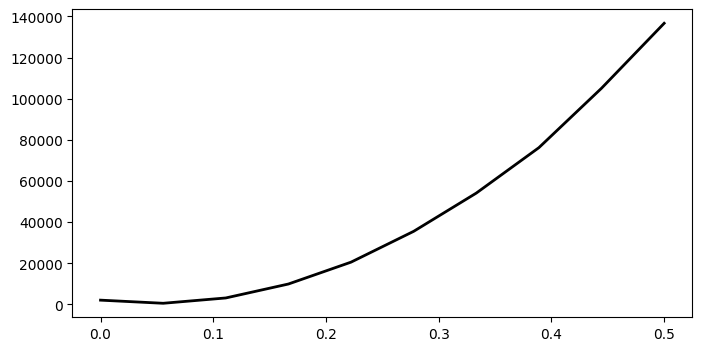

In [84]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets
np.random.seed(0)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, LogisticRegression

def mean_squared_error(y, y_pred):
    return 0.5*np.mean((y-y_pred)**2)

n_samples = 7

X_7 = np.sort(np.random.rand(n_samples))
X = np.repeat(X_7, 50)
noise = np.multiply(np.random.normal(350), 0.05)
X_Augmented = X + noise

Y_7 = np.sort(np.random.rand(n_samples))
Y_Augmented = np.repeat(Y_7, 50)

# linear_regression = LinearRegression()
# X_Augmented = X_Augmented.reshape(-1, 1)
# Y_Augmented = Y_Augmented.reshape(-1, 1)
# linear_regression.fit(X_Augmented, Y_Augmented)
# Y_augmented_predicted = linear_regression.predict(X_Augmented)

X_test = np.linspace(0, 35, 350)

mse = []
delta = np.linspace(0, 0.5, 10)
for i in delta:
    noise = np.multiply(np.random.normal(350), i)
    X_Augmented = X + noise
    linear_regression = LinearRegression()
    X_Augmented = X_Augmented.reshape(-1, 1)
    Y_Augmented = Y_Augmented.reshape(-1, 1)
    linear_regression.fit(X_Augmented, Y_Augmented)
    Y_augmented_predicted = linear_regression.predict(X_test[:, np.newaxis])
    mse.append(mean_squared_error(Y_Augmented, Y_augmented_predicted))
                       

plt.plot(delta, mse, color='black', linewidth=2)



delta_min = delta[np.argmin(mse)]
print("Minimum Delta is : " ,delta_min)
#Too little noise has no effect, whereas too much noise makes the mapping function too challenging to learn.

## **Question 2** (Logistic regression) (+50)

In this problem, we will use regression to classify two types of iris flowers ('Iris Versicolour', 'Iris Virginica') based on 4 features (petal length, petal width, sepal length, sepal width). Recall that for linear regression our model class is given as
$$
z = \theta^T x.
$$
where $\theta = \{\theta_0, ..., \theta_n\}$, and $x = \{1, x_1, ..., x_n\}$ with $n$ as the number of input attributes/features.
We define the probability of prediction y of the model class given x feature set reads
$$
p(y|x) = \frac{1}{1 + e^{-z}}.
$$
For logistic regression, we need to define a loss function (to accommodate the nature of the classification problem). We choose to use the cross entropy loss which is given as
$$
\mathcal{L}(\theta) = \sum_{i=1}^{N} y^{(i)} \, log(p(y|x)^{(i)}) + (1 - y^{(i)}) \, log(1 - p(y|x)^{(i)})
$$
where $y^{(i)}$ is the label of i*th* flower. y = 0 for 'Iris Versicolour' type and $y = 1$ for 'Iris Virginica' type. And, N is number of train samples.

We pick N = 80 for training data, and the holdout data of 20 samples, given by the code below.

1. (+10) Derive the gradient expression of the loss function for logistic regression.
2. (+10) Performing Logistic regression using the gradient descent codes that you wrote in the first homework. Plot your classfication on the testing data and report the percentage of misclassifications (circling the wrong prediction point with figure in 2.a, see lecture 1 for diabetes risk example).
3. (+15) Performing Logistic regression with L2 regularization using the gradient descent codes that you wrote in the first homework. Plot your classfication on the testing data and report the percentage of misclassifications.
4. (+5) Performing Logistic regression, using scikit-learn function [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html] compare the results with question 2.
5. (+5) Performing Logistic regression with L2 regularization , using scikit-learn function [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html], compare the results with question 3.
6. (+5) Comparing the number of wrongly predicted points from part 2 and part 3. Discuss the reason for your answer.


In [ ]:
# from sklearn import datasets

# # Load and visualize the Iris flower dataset
# iris = datasets.load_iris()
# iris.target[50:100] = 0
# iris.target[100:150] = 1
# X = np.concatenate((iris.data[50:90], iris.data[100:140]), axis = 0)
# y = np.concatenate((iris.target[50:90], iris.target[100:140]), axis = 0)

# X_holdout = np.concatenate((iris.data[90:100], iris.data[140:150]), axis = 0)
# y_holdout = np.concatenate((iris.target[90:100], iris.target[140:150]), axis = 0)

# # Visualize data
# plt.figure(figsize=(8,6))
# p1 = plt.scatter(X[:,2], X[:,3], alpha=1, c=y, cmap='Paired', s=20)
# plt.ylabel("petal width (cm)")
# plt.xlabel("petal length (cm)")
# plt.title("Train Dataset of Iris flowers")
# plt.legend(handles=p1.legend_elements()[0], labels=['Iris Versicolour', 'Iris Virginica'])
# plt.show()

# # Visualize data
# plt.figure(figsize=(8,6))
# p1 = plt.scatter(X_holdout[:,2], X_holdout[:,3], alpha=1, c=y_holdout, cmap='Paired', s=20)
# plt.ylabel("petal width (cm)")
# plt.xlabel("petal length (cm)")
# plt.title("Holdout Dataset of Iris flowers")
# plt.legend(handles=p1.legend_elements()[0], labels=['Iris Versicolour', 'Iris Virginica'])

In [85]:
# import numpy as np
# import matplotlib.pyplot as plt
# import math
# plt.rcParams['figure.figsize'] = [8, 4]

# import pandas as pd
# from sklearn import datasets

# # Load and visualize the Iris flower dataset
# iris = datasets.load_iris()
# iris.target[50:100] = 0
# iris.target[100:150] = 1
# X = np.concatenate((iris.data[50:90], iris.data[100:140]), axis = 0)
# X = pd.DataFrame(X)
# X[4] = 1
# X = X.to_numpy()
# y = np.concatenate((iris.target[50:90], iris.target[100:140]), axis = 0)

# X_holdout = np.concatenate((iris.data[90:100], iris.data[140:150]), axis = 0)
# X_holdout = pd.DataFrame(X_holdout)
# X_holdout[4] = 1
# X_holdout = X_holdout.to_numpy()
# y_holdout = np.concatenate((iris.target[90:100], iris.target[140:150]), axis = 0)

# # def z(x,theta):
# #     return x.dot(theta)

# def z(x,theta):
#     return x.dot(theta)

# def f(theta):
#     return 1/(1 + np.exp(-np.sum((X*theta), axis = 1)))

# def logistic_gradient(theta):
#     return np.mean(((f(theta) - y) * X.T), axis=1)

# # def mean_squared_error(theta):
# #     return 0.5*np.mean((y-f(theta))**2)
# def mean_squared_error(theta):
#     return -np.mean((np.multiply(y , np.log(f(theta))))+ (np.multiply(1-y , np.log(1-f(theta)))))


# threshold = 1e-6
# step_size = 0.4
# theta_prev = np.array([-1, -5, 10, 15, -20])

# #Finding an initial estimate for theta using theta_prev as reference
# theta = theta_prev - step_size * logistic_gradient(theta_prev)

# while np.linalg.norm(theta - theta_prev) > threshold:

#     step_size = 0.4
    
#     while (mean_squared_error(theta)>=mean_squared_error(theta_prev)):
#         step_size = step_size/2
#         theta_new = theta - step_size * logistic_gradient(theta)
#         theta_prev = theta
#         theta = theta_new
        
#     theta_new = theta - step_size * logistic_gradient(theta)
#     theta_prev = theta
#     theta = theta_new

# print(theta)
# test = z(X_holdout, theta)

# plt.scatter(test, y_holdout, alpha=1, c=y_holdout, cmap='Paired', s=20)
# # plt.axvline(x=0, color='r', linestyle='-')
# plt.show()
# # print(f(theta))
# print(np.mean(np.multiply(X,theta)))
# # print("Solution for 1.a with the appropriate values of theta are as follows \n Theta_1 = ", theta['bmi'], '\n Theta_2 = ', theta['bp'])

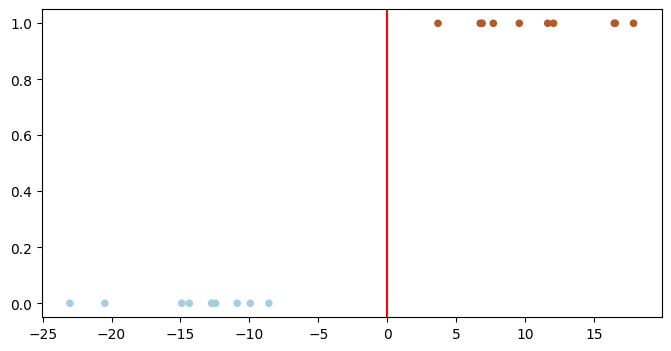

[ -2.41461417  -6.59391213   9.22718542  17.94962097 -41.64916348] 0.07403799204046477


In [66]:
### import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets

# Load and visualize the Iris flower dataset
iris = datasets.load_iris()
iris.target[50:100] = 0
iris.target[100:150] = 1
X = np.concatenate((iris.data[50:90], iris.data[100:140]), axis = 0)
X = pd.DataFrame(X)
X[4] = 1
X = X.to_numpy()
y = np.concatenate((iris.target[50:90], iris.target[100:140]), axis = 0)

X_holdout = np.concatenate((iris.data[90:100], iris.data[140:150]), axis = 0)
X_holdout = pd.DataFrame(X_holdout)
X_holdout[4] = 1
X_holdout = X_holdout.to_numpy()
y_holdout = np.concatenate((iris.target[90:100], iris.target[140:150]), axis = 0)


def z(x, theta):
    return x.dot(theta)

def f(theta):
    return 1/(1 + np.exp(-np.sum((X*theta), axis = 1)))

def logistic_gradient(theta):
    return (np.mean(((f(theta) - y) * X.T), axis=1))

def mean_squared_error(theta):
    return -np.mean((np.multiply(y , np.log(f(theta))))+ (np.multiply(1-y , np.log(1-f(theta)))))

threshold = 1e-6
step_size = 0.4
theta_prev = np.array([0,0,0,0,0])

#Finding an initial estimate for theta using theta_prev as reference
gradient = logistic_gradient(theta_prev)
theta = theta_prev - step_size * gradient

while np.linalg.norm(theta - theta_prev) > threshold:

    step_size = 0.4
    
    while (mean_squared_error(theta)>=mean_squared_error(theta_prev)):
        step_size = step_size/2
        theta_new = theta - step_size * logistic_gradient(theta)
        theta_prev = theta
        theta = theta_new
        
    theta_new = theta - step_size * logistic_gradient(theta)
    theta_prev = theta
    theta = theta_new

test = z(X_holdout, theta)

plt.scatter(test, y_holdout, alpha=1, c=y_holdout, cmap='Paired', s=20)
plt.axvline(x=0, color='r', linestyle='-')
plt.show()
print(theta, mean_squared_error(theta))
#Here, there is no misclassification as data is differentiated

[-0.06790962 -0.06817434  0.13600802  0.07878403 -0.05544358]


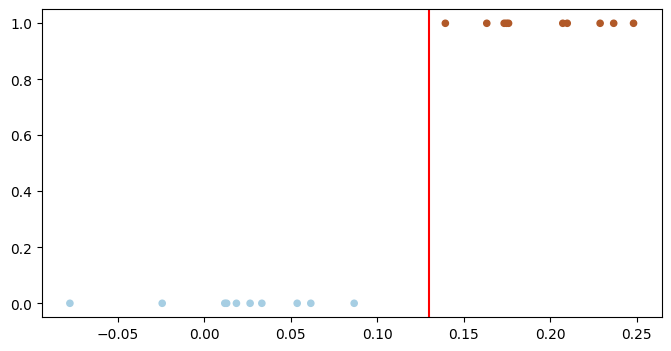

0.6718942661915197


In [105]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets

# Load and visualize the Iris flower dataset
iris = datasets.load_iris()
iris.target[50:100] = 0
iris.target[100:150] = 1
X = np.concatenate((iris.data[50:90], iris.data[100:140]), axis = 0)
X = pd.DataFrame(X)
X[4] = 1
X = X.to_numpy()
y = np.concatenate((iris.target[50:90], iris.target[100:140]), axis = 0)

X_holdout = np.concatenate((iris.data[90:100], iris.data[140:150]), axis = 0)
X_holdout = pd.DataFrame(X_holdout)
X_holdout[4] = 1
X_holdout = X_holdout.to_numpy()
y_holdout = np.concatenate((iris.target[90:100], iris.target[140:150]), axis = 0)

alpha = 1

def z(x, theta):
    return x.dot(theta)

def f(theta):
    return 1/(1 + np.exp(-np.sum((X*theta), axis = 1)))

def logistic_gradient(theta):
    return (np.mean(((f(theta) - y) * X.T), axis=1)) + alpha*np.sum(theta)

def mean_squared_error(theta):
    return -np.mean((np.multiply(y , np.log(f(theta))))+ (np.multiply(1-y , np.log(1-f(theta)))))+ 0.5*alpha*(np.sum(np.multiply(theta, theta)))

threshold = 1e-6
step_size = 0.4
theta_prev = np.array([0, 0, 0, 0, 0])

theta = theta_prev - step_size * logistic_gradient(theta_prev)

while np.linalg.norm(theta - theta_prev) > threshold:

    step_size = 0.01
    
    while (mean_squared_error(theta)>=mean_squared_error(theta_prev)):
        step_size = step_size/2
        theta_new = theta - step_size * logistic_gradient(theta)
        theta_prev = theta
        theta = theta_new
        
    theta_new = theta - step_size * logistic_gradient(theta)
    theta_prev = theta
    theta = theta_new

print(theta)
test = z(X_holdout, theta)

plt.scatter(test, y_holdout, alpha=1, c=y_holdout, cmap='Paired', s=20)
plt.axvline(x=0.13, color='r', linestyle='-')
plt.show()
print(mean_squared_error(theta))
#Here, there is no misclassification as data is differentiated

In [88]:
# ### import numpy as np
# import matplotlib.pyplot as plt
# import math
# plt.rcParams['figure.figsize'] = [8, 4]

# import pandas as pd
# from sklearn import datasets

# # Load and visualize the Iris flower dataset
# iris = datasets.load_iris()
# iris.target[50:100] = 0
# iris.target[100:150] = 1
# X = np.concatenate((iris.data[50:90], iris.data[100:140]), axis = 0)
# X = pd.DataFrame(X)
# X[4] = 1
# X = X.to_numpy()
# y = np.concatenate((iris.target[50:90], iris.target[100:140]), axis = 0)

# X_holdout = np.concatenate((iris.data[90:100], iris.data[140:150]), axis = 0)
# X_holdout = pd.DataFrame(X_holdout)
# X_holdout[4] = 1
# X_holdout = X_holdout.to_numpy()
# y_holdout = np.concatenate((iris.target[90:100], iris.target[140:150]), axis = 0)

# alpha = 0.1

# def z(x, theta):
#     return x.dot(theta)

# def f(theta):
#     return 1/(1 + np.exp(-np.sum((X*theta), axis = 1)))

# def logistic_gradient(theta):
#     return (np.mean(((f(theta) - y) * X.T), axis=1)) + alpha*(theta)

# def mean_squared_error(theta):
#     return -np.mean((np.multiply(y , np.log(f(theta))))+ (np.multiply(1-y , np.log(1-f(theta))))) + 0.5*alpha*(np.sum(np.multiply(theta, theta)))

# threshold = 1e-6
# step_size = 0.4
# theta_prev = np.array([0,0,0,0,0])

# #Finding an initial estimate for theta using theta_prev as reference
# gradient = logistic_gradient(theta_prev)
# theta = theta_prev - step_size * gradient

# while np.linalg.norm(theta - theta_prev) > threshold:

#     step_size = 0.01
    
#     while (mean_squared_error(theta)>=mean_squared_error(theta_prev)):
#         step_size = step_size/2
#         theta_new = theta - step_size * logistic_gradient(theta)
#         theta_prev = theta
#         theta = theta_new
        
#     theta_new = theta - step_size * logistic_gradient(theta)
#     theta_prev = theta
#     theta = theta_new

# test = z(X_holdout, theta)

# plt.scatter(test, y_holdout, alpha=1, c=y_holdout, cmap='Paired', s=20)
# plt.axvline(x=0, color='r', linestyle='-')



# plt.show()
# print(theta, mean_squared_error(theta))
# # print("Solution for 1.a with the appropriate values of theta are as follows \n Theta_1 = ", theta['bmi'], '\n Theta_2 = ', theta['bp'])

[-20.89357544]
[[ -2.41313917  -6.60605646   9.24622676  17.991086   -20.89357544]]


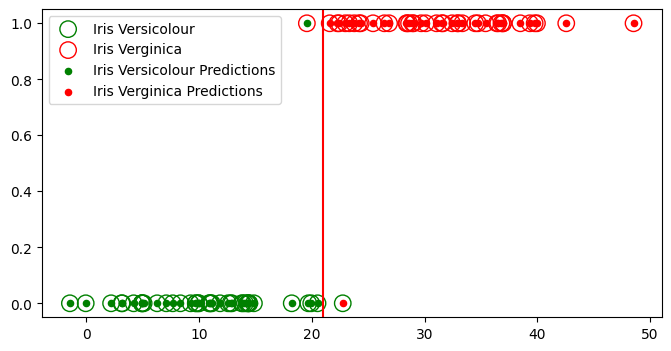

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets

# Load and visualize the Iris flower dataset
iris = datasets.load_iris()
iris.target[50:100] = 0
iris.target[100:150] = 1
X = np.concatenate((iris.data[50:90], iris.data[100:140]), axis = 0)
X = pd.DataFrame(X)
X[4] = 1
X = X.to_numpy()
y = np.concatenate((iris.target[50:90], iris.target[100:140]), axis = 0)

X_holdout = np.concatenate((iris.data[90:100], iris.data[140:150]), axis = 0)
X_holdout = pd.DataFrame(X_holdout)
X_holdout[4] = 1
X_holdout = X_holdout.to_numpy()
y_holdout = np.concatenate((iris.target[90:100], iris.target[140:150]), axis = 0)

def z(x, theta):
    return x.dot(theta)

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty = 'none', random_state=0).fit(X, y)
t= clf.predict(X)
a = clf.coef_
print(clf.intercept_)
print(a)
C = z(X, a.T)
plt.scatter(C[y==0], y[y==0], marker='o', s=140, facecolors='none', edgecolors='g')
plt.scatter(C[y==1], y[y==1], marker='o', s=140, facecolors='none', edgecolors='r')
plt.scatter(C[t==0], y[t==0], color='g', s=20)
plt.scatter(C[t==1], y[t==1], color='r', s=20)
plt.legend(['Iris Versicolour', 'Iris Verginica', 'Iris Versicolour Predictions', 'Iris Verginica Predictions'])
plt.axvline(x=21, color='r', linestyle='-')
#intercept is a little adjusted but other values of theta coefficients are pretty similar and there are a few misclassifications here

In [99]:
# import numpy as np
# import matplotlib.pyplot as plt
# import math
# plt.rcParams['figure.figsize'] = [8, 4]

# import pandas as pd
# from sklearn import datasets

# # Load and visualize the Iris flower dataset
# iris = datasets.load_iris()
# iris.target[50:100] = 0
# iris.target[100:150] = 1
# X = np.concatenate((iris.data[50:90], iris.data[100:140]), axis = 0)
# X = pd.DataFrame(X)
# X[4] = 1
# y = np.concatenate((iris.target[50:90], iris.target[100:140]), axis = 0)

# X_holdout = np.concatenate((iris.data[90:100], iris.data[140:150]), axis = 0)
# X_holdout = pd.DataFrame(X_holdout)
# X_holdout[4] = 1
# y_holdout = np.concatenate((iris.target[90:100], iris.target[140:150]), axis = 0)

# def z(x, theta):
#     return x.dot(theta)

# from sklearn.datasets import load_iris
# from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(penalty = 'l2', random_state=None, C=1.0).fit(X, y)
# t= clf.predict(X)
# a = clf.coef_

# plt.scatter(C[y==0], y[y==0], marker='o', s=140, facecolors='none', edgecolors='g')
# plt.scatter(C[y==1], y[y==1], marker='o', s=140, facecolors='none', edgecolors='r')
# plt.scatter(C[t==0], y[t==0], color='g', s=20)
# plt.scatter(C[t==1], y[t==1], color='r', s=20)
# plt.legend(['Iris Versicolour', 'Iris Virginica', 'Iris Versicolour Predictions', 'Iris Virginica Predictions'])

[-12.98717138]
[[-4.46078675e-01 -4.74168598e-01  2.78506115e+00  2.05257565e+00
  -1.50856935e-05]]
            0
0   11.323488
1   11.239381
2   12.177783
3   10.264557
4   11.662946
..        ...
75  16.852470
76  16.100040
77  14.687631
78  12.963937
79  14.801858

[80 rows x 1 columns]


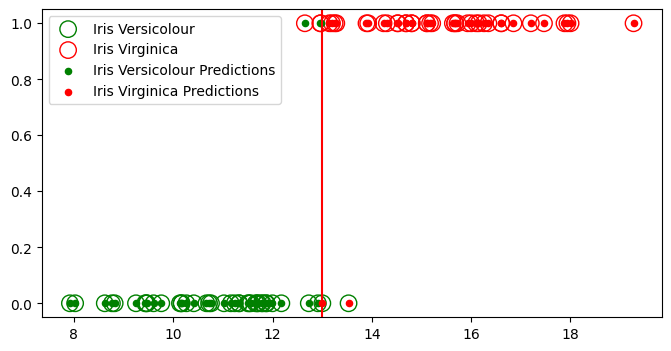

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets

# Load and visualize the Iris flower dataset
iris = datasets.load_iris()
iris.target[50:100] = 0
iris.target[100:150] = 1
X = np.concatenate((iris.data[50:90], iris.data[100:140]), axis = 0)
X = pd.DataFrame(X)
X[4] = 1
y = np.concatenate((iris.target[50:90], iris.target[100:140]), axis = 0)

X_holdout = np.concatenate((iris.data[90:100], iris.data[140:150]), axis = 0)
X_holdout = pd.DataFrame(X_holdout)
X_holdout[4] = 1
y_holdout = np.concatenate((iris.target[90:100], iris.target[140:150]), axis = 0)

def z(x, theta):
    return x.dot(theta)

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty = 'l2', random_state=None).fit(X, y)
t= clf.predict(X)
a = clf.coef_
print(clf.intercept_)
print(a)
C = z(X, a.T)
print(C)
plt.scatter(C[y==0], y[y==0], marker='o', s=140, facecolors='none', edgecolors='g')
plt.scatter(C[y==1], y[y==1], marker='o', s=140, facecolors='none', edgecolors='r')
plt.scatter(C[t==0], y[t==0], color='g', s=20)
plt.scatter(C[t==1], y[t==1], color='r', s=20)
plt.legend(['Iris Versicolour', 'Iris Virginica', 'Iris Versicolour Predictions', 'Iris Virginica Predictions'])
plt.axvline(x=13, color='r', linestyle='-')
#Coefficients are a little different from part 3 but spread is similar and there are a few misclassifications here

In [ ]:
#Number of wrongly predicted points more in Part 2 than Part 3 because we used regularisation to minimise 
#the impact of variable not being used
#Regularization is a penalty against complexity. 
#Increasing the regularization strength penalizes “large” weight coefficients
#Since, we don’t want the model to memorize the training dataset, 
#we want a model that generalizes well to new, unseen data.
#For that, regularisation makes sense